In [1]:
import numpy as np
import pylab
import math
import matplotlib.pyplot as plt
import scipy.stats as sps
%matplotlib inline
# Поддержка русскоязычных надписей.
pylab.rc('font',**{'family':'verdana'})

In [2]:
# Чтение выборки из файла.
f = open('cauchy.txt', 'r')
sample = []
for x in f:
    sample.append(float(x))
f.close()

In [3]:
# Плотность распределения Коши с единичным параметром масштаба и параметром формы x0.
def p(x0, x):
    return 1 / (math.pi * (1 + (x - x0)**2))

In [4]:
# Логарифмическая функция правдоподобия.
def log_fn(x0, n):
    Sum = -n * math.log(math.pi)
    for x in sample[:n]:
        Sum += -math.log(1+ (x - x0)**2)
    return Sum

In [5]:
# Считает оценку максимального правдоподобия.
def max_arg(n):
    x = np.linspace(-500, 500, 10000)
    y = [log_fn(t, n) for t in x]
    
    plt.plot(x,y)

    # Находим maxarg.
    max_index = 0
    max_fn = y[0]

    for i in range(1, x.size):
        if (y[i] > max_fn):
            max_fn = y[i]
            max_index = i

    max_arg = x[max_index]
    plt.scatter(max_arg, max_fn)
    plt.title(u"Логарифмическая функция правдоподобия и максимальное значение")
    plt.show()
    return max_arg

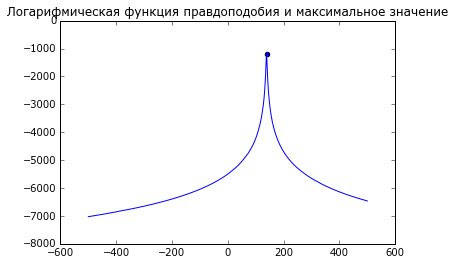

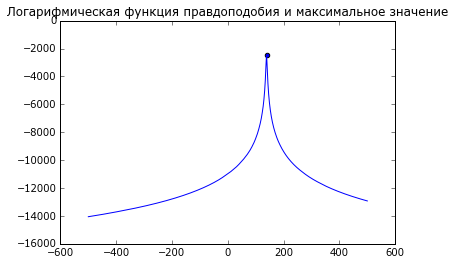

In [6]:
est_half = max_arg(len(sample) // 2)
est_all = max_arg(len(sample))

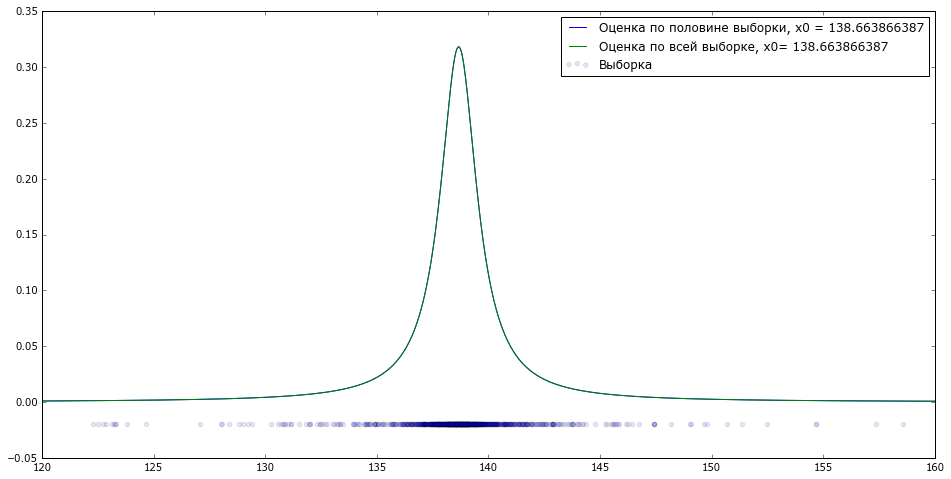

In [14]:
# График плотности искомого распределения.
x = np.linspace(120, 160, 1000)
y = [p(est_half, t) for t in x]
z = [p(est_all, t) for t in x]
plt.figure(figsize=(16, 8))
plt.plot(x, y, label=u"Оценка по половине выборки, x0 = " + str(est_half))
plt.plot(x, z, label=u"Оценка по всей выборке, x0= " + str(est_all))
plt.scatter(sample, np.zeros(len(sample)) - 0.02, alpha=0.1, label=u"Выборка")
plt.xlim(120, 160)
plt.legend()
plt.show()